<a href="https://colab.research.google.com/github/HellCatCruiser/Prob-Stats/blob/main/Assignment2_P%26S_D_Linger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment II: Classification of flowers

by *David Linger #2741629*
started on 22/03/2025

### Outline
In this assignment you will analyze a well-known statistical classification problem. The
dataset consists of 50 samples from each of three species of Iris flowers (Iris setosa, Iris
virginica , and Iris versicolor). Four features were measured from each sample, namely
the length and the width of sepal and petal (in centimeters). One of the most famous
statisticians, sir Ronald Fisher, investigated if one can predict to which type a flower
belongs, based on these four characteristics. We consider a slightly simplified version
of this problem in which we only consider discrimination between two types of flower,
Iris versicolor (call this type 0) and Iris virginica (call this type 1) and will only use the
petal length and width for classification.
Figure 1: Left: Iris versicolor. Right: Iris virginica
.

### task 1 description
The flower-data are available in R. Issue the following commands:
data(iris)
d <- iris
library(tidyverse)
x0 <- d %>% filter(Species=="versicolor") %>% select(3:4)
x1 <- d %>% filter(Species=="virginica") %>% select(3:4)


Now x0 and x1 contain the measurements of type 0 and 1 respectively.
###(Question: A)
Make a plot of petal width versus petal length representing all flowers (of Species
types versincolor and virginica) in the dataset. Use a different plotting character
or colour for both types of flowers.
1


In [4]:
data(iris)
d <- iris
library(tidyverse)
x0 <- d %>% filter(Species=="versicolor") %>% select(3:4)
x1 <- d %>% filter(Species=="virginica") %>% select(3:4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [14]:
?points

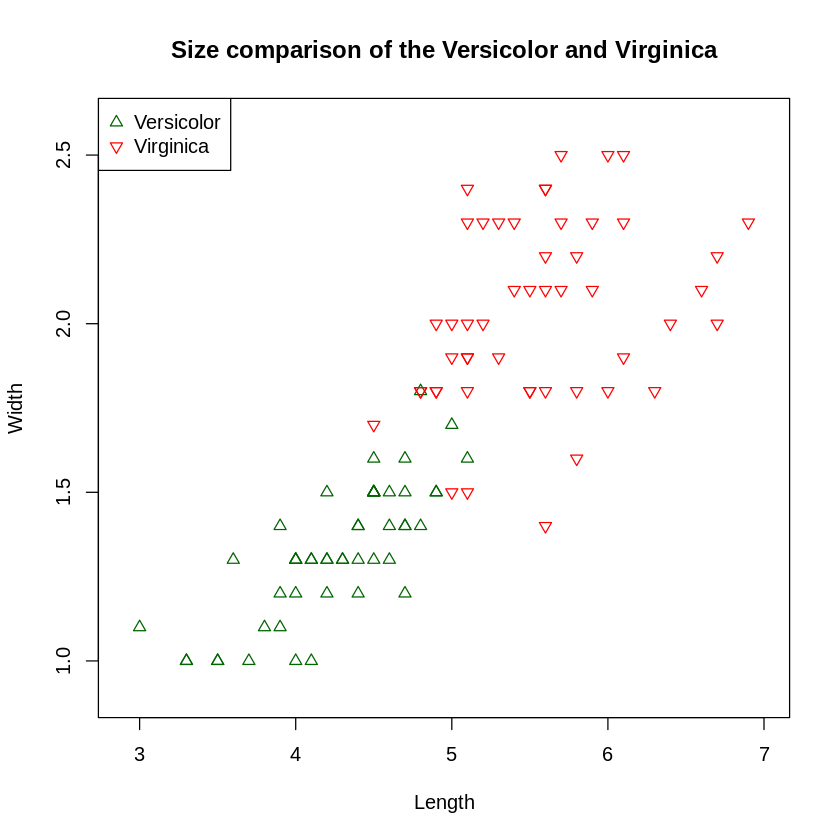

In [86]:
# find the range of the petal width and length in the dataset
y_min <- min(c(min(x0$Petal.Width), min(x1$Petal.Width))) - .1
y_max <- max(c(max(x0$Petal.Width), max(x1$Petal.Width))) + .1
x_min <- min(c(min(x0$Petal.Length), min(x1$Petal.Length))) - .1
x_max <- max(c(max(x0$Petal.Length), max(x1$Petal.Length))) + .1

#Create the plot for x0(versicolor) (single coloring)
plot(x0,
  type = "p", # dot plot
  pch = 24,
  col = "darkgreen",
  main = "Size comparison of the Versicolor and Virginica", #Title
  xlab = "Length", # X-axis Lable,
  ylab = "Width", # Y-axis Lable
  xlim = c(x_min, x_max), # Set x-axis limits
  ylim = c(y_min, y_max) # Set y-axis limit
)

# add the second set x1 (Virginica)
points(x1,
  type = "p", # dot plot
  pch = 25,
  col = "red"
)
legend("topleft", legend = c("Versicolor", "Virginica"),
      col = c("darkgreen", "red"),
      pch = c(24, 25)
)

###(Question: B)
Suppose we find a new flower which is known to be either of type 0 or 1. If its
petal length and width are 4.0 and 1.1 respectively, which type of flower would
you think it is? What if its length is 6 and its width is 2.3.? What if its length is
5.0 and its width is 1.7?

### Answer:
based on the previous graph if the petal length and width is at 4.0, and 1.1 respectively, based on this data I would have to conclude that it is a Versicolor species petal as there is a strict overrepresentation in the bottom half of the graph where the petal sizes are smaller.

In case of the the second measurement seeing as the petal is on the larger side I would relatively confidently conclude it is part of the Virginica Species.

The third measurement however is a toss-up and there is no way to say with any degree of confidence whether the petal is from either species, based on this information alone.


## Outline

We model the flower data as independent pairs (Xi, Yi). Here, Yi ∈ {0, 1} is a Bernoulli
random variable specifying the type of flower i. Denote P (Yi = 0) = p0 and P (Yi = 1) =
p1 so that p0 + p1 = 1. The random vector Xi = (Xi1, Xi2) denotes the petal length and
width of the i-th flower.

Our goal is to find a classification rule that makes accurate predictions. In other words,
given a measurement x (the petal length and width of a flower), we wish to predict
whether Y = 0 (the flower is of type versicolor) or Y = 1 (the flower is of type virginica).

For this we define a statistical model. We assume P (Y = 0) = p0 and P (Y = 1) = p1,
where p1 = 1 − p0. Given that a flower is of type 0, i.e. given the event {Y = 0}, we
denote the probability density function of x by
f0(x) = f (x | Y = 0).

Similarly we let f1(x) = f (x | Y = 1). Note that f0 and f1 are bivariate probability
density functions since x is a two-dimensional vector. 1 By using Bayes’ rule it follows
that
P (Y = k | X = x) = pkfk(x)
p0f0(x) + p1f1(x), k ∈ {0, 1}.

Check this for yourself! A natural classification rule is to choose type 0 if
P (Y = 0 | X = x) > P (Y = 1 | X = x), (1)
and type 1 otherwise. In other words, given the data, we choose the flower type which
is most probable. It can be proved that this rule is optimal in a certain sense (we do
not go into details here).

###(Question: C)
Show that the inequality in (1) is equivalent to
f0(x)p0 > f1(x)p1. (2)
If we would know f0(x), f1(x), p0 and p1, classification would be straightforward. How-
ever, these are all unknown to us and so we will estimate these from the available data.
In classification problems, the available data is often referred to as the training set.

